# QUESTION 01a

##### Apply the random walk Metropolis algorithm using N = 10000 and s = 1. Use the generated samples (x1, . . . xN ) to construct a histogram and a kernel density plot in the same figure. Note that these provide estimates of f(x).Overlay a graph of f(x) on this figure to visualise the quality of these estimates.

In [1]:
# importing the necassary libraries

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# initializing variables

x_0 = 2 # initial value
N = 10000
s = 1
sample_list = []

# to extract the y coordinates to plot f(x) 
y_list = []

## Random Walk Metropolis

In [3]:
# generating a sequence of x0, x1, x2, ....., xN using an initial value x0

def random_simulator(x_0, s, N):

    for i in range(N):
        
        # generating a random number from a normal distribution 
        x_star = np.random.normal(loc = x_0, scale = s)

        f_x_star = (math.exp(-abs(x_star)))/2
        f_x_before = (math.exp(-abs(x_0)))/2
        
        # Generating a random number from a uniform distribution between 0 and 1
        u = np.random.uniform(low = 0, high = 1)
        log_u = math.log(u)

        r = f_x_star/f_x_before
        log_r = math.log(r)
        
        # deciding the next value of x based on the condition provided in the explained procedure
        if log_u < log_r:
            x_i = x_star
        else:
            x_i = x_0
            
        # appending the resulting value of x_i from the condition     
        sample_list.append(x_i) 
        # setting the initial value of the normal distribution as a result from the condition
        x_0 = x_i
        
    # converting the sample list into an array    
    sample_array = np.asarray(sample_list)
    return sample_array

In [4]:
# returns the sample arrray generated from running the function
sample_array = random_simulator(x_0, s, N)
print(sample_array)

[ 2.          2.          2.         ...  0.23228513 -0.88956373
 -0.49198661]


In [5]:
# Checking the total amount of numbers appended to the empty list.
len(sample_list)

10000

In [6]:
# calculating the coordinates required to plot the original graph f(x) so that it can be compared with the simulation

x_array = np.arange(np.min(sample_array), np.max(sample_array), 0.002)

for x in x_array:
    y_list.append((math.exp(-abs(x)))/2)

y_array = np.array(y_list)    

## Plotting the figures

### Histogram, Kernel Density Plot, f(x)

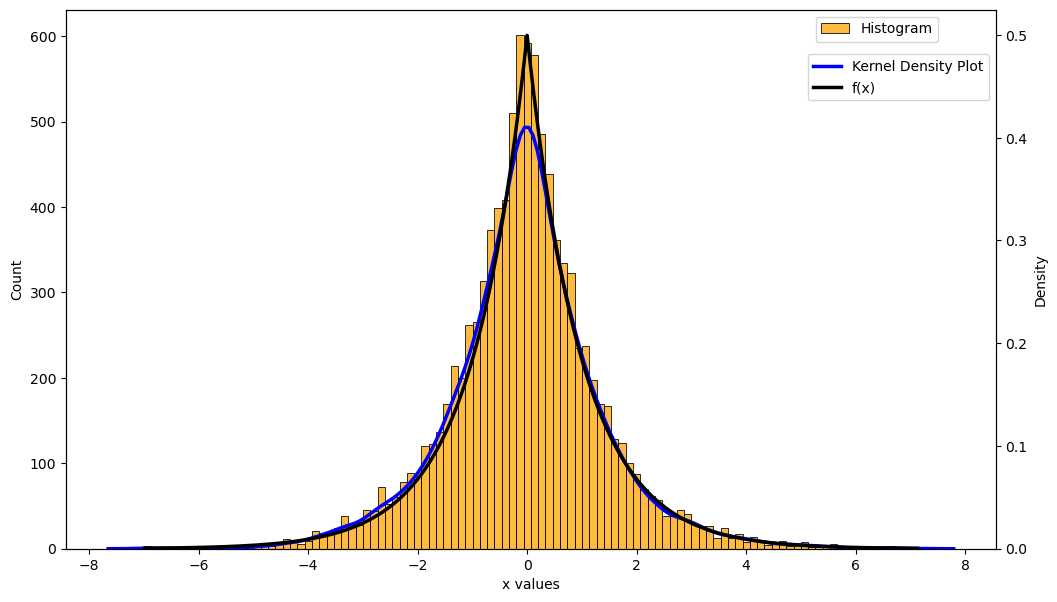

In [7]:
# plotting the histogram, kernel density with the overlayed f(x) graph for comparison
fig, ax1 = plt.subplots(figsize=(12, 7))

# adding the x axis label
ax1.set_xlabel('x values')

sns.histplot(sample_array, color = 'orange', ax=ax1, edgecolor = 'black', label = 'Histogram')

ax2 = ax1.twinx()

sns.kdeplot(sample_array, color='blue', ax=ax2, linewidth = 2.5, label = 'Kernel Density Plot')

ax2.plot(x_array, y_array, color = 'black', linewidth = 2.5, label = 'f(x)')

# Adjusting the f(x) graph to level up the kernal density plot
ax2.set_ylim(0)

# positioning the legends for identification
ax1.legend(loc='upper right', bbox_to_anchor=(0.945, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.93))
plt.show()

##### Report the sample mean and standard deviation of the generated samples (Note: these are also known as the Monte Carlo estimates of the mean and standard deviation respectively).


In [8]:
# The estimates rounded off to 3 significant figures
sample_mean = sample_array.mean()
sample_std = sample_array.std(ddof=1)

print("Monte Carlo estimate of the MEAN: {:.4f}".format(sample_mean))
print("Monte Carlo estimate of the STANDARD DEVIATION: {:.3f}".format(sample_std))

Monte Carlo estimate of the MEAN: -0.0342
Monte Carlo estimate of the STANDARD DEVIATION: 1.381


# QUESTION 01b

##### Generate more than one sequence of x0, . . . , xN , potentially using different initial values x0. Denote each of these sequences, also known as chains, by x(j)0,  x(j)1,  . . . ,  x(j)N) for j = 1, 2, . . . , J.

In [9]:
# initializing values
N = 2000
J = 4
s = 0.001
x_0 = 0

In [10]:
initial_values = []
sample_list = []
R_hat_list = []

np.random.seed(33)
# setting 4 initial values for the mean as mentioned in the question for the loop
for j in range(J):
    initial_values.append(np.random.rand())
       
print(initial_values)

# intitial_values = [0.18116664497580182, 0.2995467273082483, 0.3857377495233537, 0.407988368924336]

[0.24851012743772993, 0.44997542105079547, 0.4109408029965408, 0.26029969088689986]


### Generating R hat values

In [11]:
def R_hat_generator(x_0, s_value, N, J):
    
    # Generating J chains(sequences) of each having N elements
    chains = [random_simulator(x_0, s_value, N) for x_0 in initial_values]
    chains = np.array(sample_list)
    reshaped_array = np.reshape(chains, (J, N))
    
    # computes the sample mean of chain j
    Mj_array = np.mean(reshaped_array, axis= 1)

    #  computes the sample variance of chain j
    Vj_array = np.var(reshaped_array, axis = 1, ddof=0)

    #  computes the overall within sample variance W
    W = np.mean(Vj_array)

    # computes the overall sample mean M
    M = np.mean(Mj_array)

    # computes the between sample variance B
    B = np.var(Mj_array, ddof=1)

    # Calculates the R hat value
    R_hat = math.sqrt(((B+W))/W)
    return R_hat

In [12]:
R_hat_list = []
# generating a list of an arbitary number of R hat values over the range of s values provided

# set of coordinates for the list
s_values = np.linspace(0.001, 1, 250)
for s_value in s_values:
    
    sample_list = []
    R_hat = R_hat_generator(2, s_value, N, J)
    R_hat_list.append(R_hat)
 
# prints the number of R hat values generated
len(R_hat_list)

250

##### Rb close to 1 indicate convergence, and it is usually desired for Rb to be lower than 1.05. Calculate the Rb for the random walk Metropolis algorithm with N = 2000, s = 0.001 and J = 4.

Calculate the R hat for the random walk Metropolis algorithm with N = 2000, s = 0.001 and J = 4.

In [13]:
# R hat given to 3 decimal places
print(f'Value of R hat: {round(R_hat_list[0], 3)}')

Value of R hat: 5.054


##### Keeping N and J fixed, provide a plot of the values of Rb over a grid of s values in the interval between 0.001 and 1.


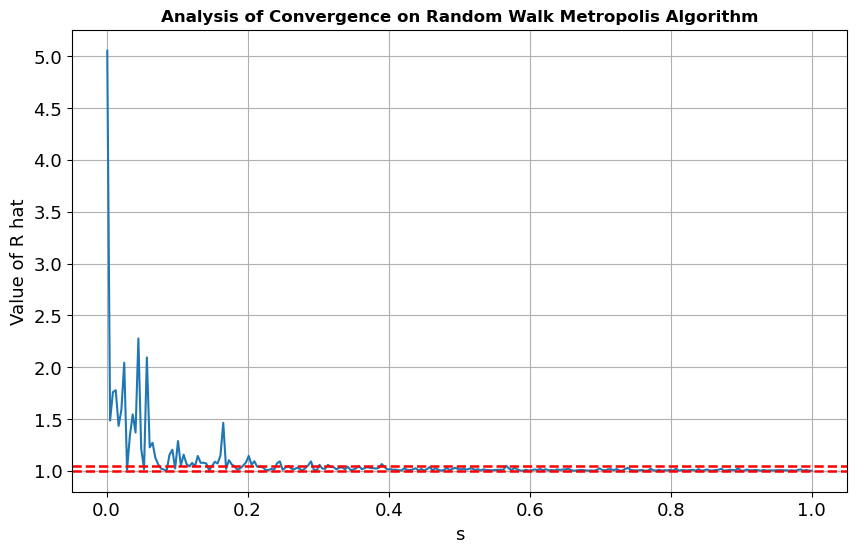

In [14]:
plt.figure(figsize=(10, 6))  

# Displaying a line plot to confirm if R hat converges when s tends to 1
sns.lineplot(x = s_values, y = R_hat_list)

plt.xticks(fontsize=13)
plt.xlabel('s', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Value of R hat', fontsize=13)

plt.title('Analysis of Convergence on Random Walk Metropolis Algorithm', fontweight = 'bold')

# adding a threshold to indicate the convergence band
threshold = 1.05
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})', linewidth = 1.8)

threshold = 1.0
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})', linewidth = 1.8)

plt.grid(True)
plt.show()

In general, values of R hat close to 1 indicate convergence, and it is usually desired for R hat to be lower than 1.05.

### R hat values generated for plotting

In [16]:
print(R_hat_list)

[5.053503848655489, 1.4838890649485532, 1.7585207619265204, 1.777103138278167, 1.4327542889502005, 1.5884970056912517, 2.042453325307532, 1.009919108127845, 1.3398705474888257, 1.543652528937857, 1.3683584714154389, 2.2767393007511085, 1.2140864247916205, 1.01588628271397, 2.093942261469501, 1.2256347444536946, 1.270232060878464, 1.1245052604919479, 1.0622454897960196, 1.0206995690774974, 1.0104971770357385, 1.0011116177256223, 1.1540997389084617, 1.2031931005302157, 1.0216207281327077, 1.2865853061986712, 1.0498770494789662, 1.1553639595580107, 1.0663704003451884, 1.04096948831423, 1.0758751370154598, 1.042198115139597, 1.1428381059074775, 1.0763312014294528, 1.0775408787650727, 1.070017777359454, 1.0034664767996557, 1.0437893117719295, 1.0865463793680197, 1.0699544621148622, 1.1459456082242347, 1.4621439169050157, 1.017521587820224, 1.101866909541255, 1.0604191023157798, 1.0424566041659395, 1.0082757014033834, 1.0239302178603047, 1.0485440308688463, 1.0792799197351428, 1.143383856515